# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
# Eren Badur CS210 Homework 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [3]:
from bs4 import BeautifulSoup

with open("/Users/student/Downloads/CS210 - Homework 1 - for BeautifulSoup.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

playlist = soup.find('table', {"class": "info-table"})

def scrapeData(table):
    headers = [header.get_text() for header in table.findAll('th')]
    table_data = []
    for row in table.findAll('tr')[1:]:
        cols = row.findAll('td')
        row_data = [col.get_text() for col in cols]
        if row_data:
            table_data.append(row_data)
    return pd.DataFrame(table_data, columns=headers)

df = scrapeData(playlist)
df

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,...,52,0,0,-10 db,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,...,26,0,20,-10 db,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,forever,Charli XCX,53,87,"art pop, candy pop, metropopolis, pop, uk pop","Pop, Electronic",how i'm feeling now,2020-05-15,04:03,...,46,10,10,-3 db,C♯/D♭ Minor,4,2023-10-26,5GsJIVCBFjhCcUwJaTW2sB,Atlantic Records UK,12A
322,323,Silk Chiffon,"MUNA,Phoebe Bridgers",71,97,"indie pop, indie poptimism, la pop, metropopol...","Pop, Electronic",MUNA,2022-06-24,03:26,...,44,0,10,-6 db,G#/A♭ Major,4,2023-10-26,5ECxiK4Vigo1yRRmAoZc1f,Dead Oceans,4B
323,324,So Hot You're Hurting My Feelings,Caroline Polachek,69,112,"art pop, escape room, indie pop, indietronica",Pop,Pang,2019-10-18,03:03,...,85,0,10,-5 db,F#/G♭ Major,4,2023-10-26,5B6Kjha6RRIMWGN7zGsAaT,Perpetual Novice,2B
324,325,First Love/Late Spring,Mitski,81,100,"brooklyn indie, pov: indie","Rock, Pop",Bury Me At Makeout Creek,2014-11-11,04:38,...,10,0,20,-8 db,C Major,4,2023-10-26,3sslYZcFKtUvIEWN9lADgr,Dead Oceans,8B


In [4]:
#READ THE DATA DIRECTLY - 0 PTS


Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [5]:
#2pts - show the first 3 rows

df.head(3)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [6]:
#1pts - show the info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    object
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    object
 4   BPM               326 non-null    object
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    object
 11  Energy            326 non-null    object
 12  Acoustic          326 non-null    object
 13  Instrumental      326 non-null    object
 14  Happy             326 non-null    object
 15  Speech            326 non-null    object
 16  Live              326 non-null    object
 17  Loud            

In [7]:
#2pts - give the statistical summary of numerical columns

df.describe()

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
count,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326
unique,326,321,142,79,100,136,36,215,192,162,...,92,5,8,17,24,3,2,326,100,24
top,1,I Know The End,Arctic Monkeys,0,130,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2022-02-11,03:03,...,26,0,10,-9 db,A Major,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,11B
freq,1,2,25,28,14,25,84,6,10,7,...,10,306,156,53,33,307,283,1,40,33


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [8]:
#5pts

genres = df['Genres'].str.split(', ', expand=True).stack()

topGenres = genres.value_counts().head(10)

topGenres

indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37
Name: count, dtype: int64

Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [9]:
#6pts

temp = df.to_csv("Datatable.csv")
df = pd.read_csv("Datatable.csv")

genresExp = df.assign(Genres=df['Genres'].str.split(', ')).explode('Genres')

allGenres = genresExp['Genres'].value_counts()
commonGenres = allGenres[allGenres > 10].index.tolist()

filteredGenres = genresExp[genresExp['Genres'].isin(commonGenres)]

popularGenres = filteredGenres.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).head(5)

popularGenres

Genres
permanent wave     67.916667
pop                65.823529
sheffield indie    65.645161
garage rock        65.027027
la indie           62.076923
Name: Popularity, dtype: float64

Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [10]:
#5pts

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

popularity75 = df['Popularity'].quantile(0.75)
popularity25 = df['Popularity'].quantile(0.25)

df['Popularity_Category'] = pd.cut(df['Popularity'],
                                   bins=[-np.inf, popularity25, popularity75, np.inf],
                                   labels=['Low', 'Medium', 'High'])

df['BPM'] = pd.to_numeric(df['BPM'], errors='coerce')

df['BPM_Category'] = pd.cut(df['BPM'],
                            bins=[-np.inf, 100, 130, np.inf],
                            labels=['Slow', 'Medium', 'Fast'])

popularityCategory = df['Popularity_Category'].value_counts()
bpmCategory = df['BPM_Category'].value_counts()

popularityCategory, bpmCategory



(Popularity_Category
 Medium    163
 Low        84
 High       79
 Name: count, dtype: int64,
 BPM_Category
 Medium    151
 Fast      107
 Slow       68
 Name: count, dtype: int64)

Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [11]:
#3pts

df = df.loc[:, ~df.columns.str.contains("Unnamed")]

df['Song'] = df['Song'].str.strip().str.title()
df['Artist'] = df['Artist'].str.strip().str.title()

filteredSong = df[(df['Song'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

filteredSong

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.

In [12]:
#6pts

df['Loud'] = df['Loud'].str.replace(' db', '', regex=False).astype(float)

loudness75 = df['Loud'].quantile(0.75)

songs = df[
    (df['Popularity_Category'] == "High") &
    (df['BPM_Category'] == "Fast") &
    (df['Loud'] > loudness75)
]

filteredAlbum = songs['Album'].mode().iloc[0]

filteredAlbum

'Favourite Worst Nightmare'

Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [13]:
#5pts

popularity90 = df['Popularity'].quantile(0.9)

popularity10 = df[df['Popularity'] >= popularity90]

commonCamelot = popularity10['Camelot'].mode()[0]

commonCamelot

'10B'

## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

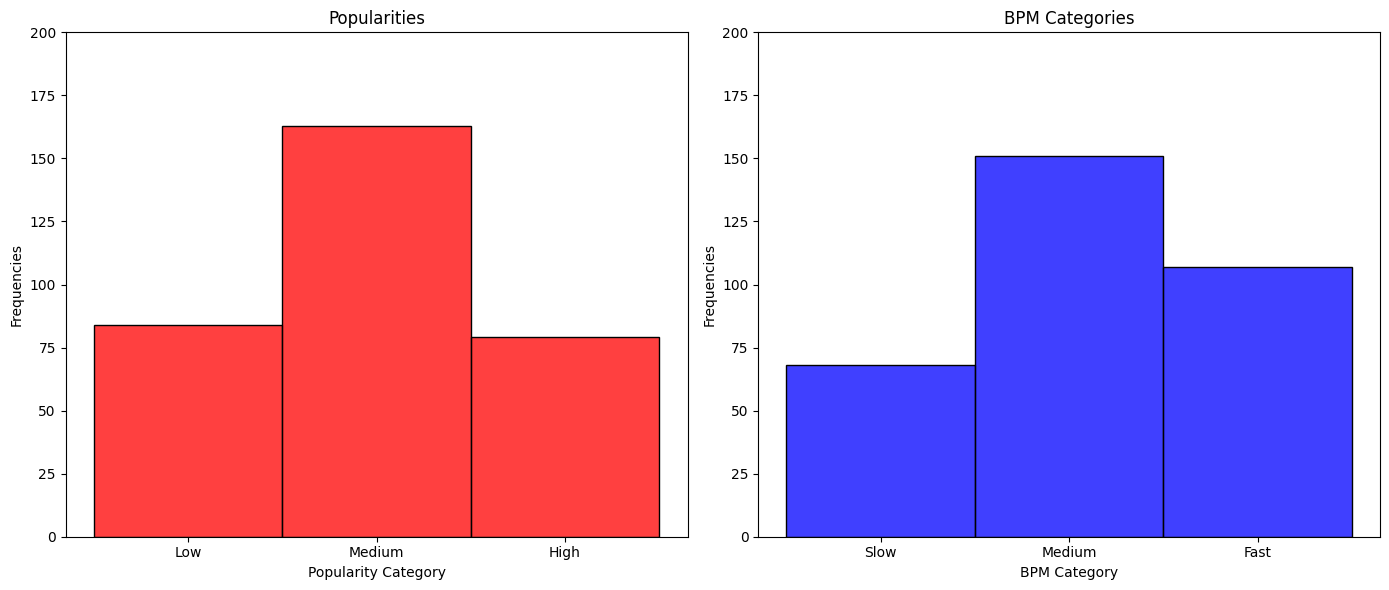

In [14]:
#2pts

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Popularity_Category'], bins=30, color='red', ax=axes[0])
axes[0].set_title('Popularities')
axes[0].set_xlabel('Popularity Category')
axes[0].set_ylabel('Frequencies')
axes[0].set_ylim(0, 200)

sns.histplot(df['BPM_Category'], bins=30, color='blue', ax=axes[1])
axes[1].set_title('BPM Categories')
axes[1].set_xlabel('BPM Category')
axes[1].set_ylabel('Frequencies')
axes[1].set_ylim(0, 200)

plt.tight_layout()
plt.show()

Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

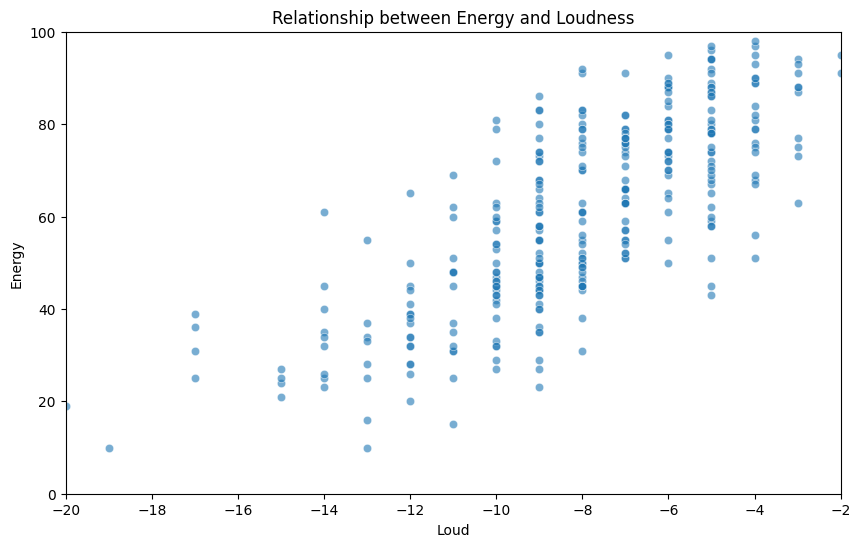

In [15]:
#3pts

if isinstance(df['Loud'].iloc[0], str) and 'db' in df['Loud'].iloc[0]:
    df['Loud'] = df['Loud'].str.replace(' db', '').astype(float)
else:
    df['Loud'] = df['Loud']

df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')

df.dropna(subset=['Energy', 'Loud'], inplace=True)

filteredDf = df[
    (df['Loud'] >= -20) & 
    (df['Loud'] <= -2) & 
    (df['Energy'] >= 0) & 
    (df['Energy'] <= 100)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filteredDf, x='Loud', y='Energy', alpha=0.6)
plt.title('Relationship between Energy and Loudness')
plt.xlabel('Loud')
plt.ylabel('Energy')
plt.xlim(-20, -2)
plt.ylim(0, 100)
plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


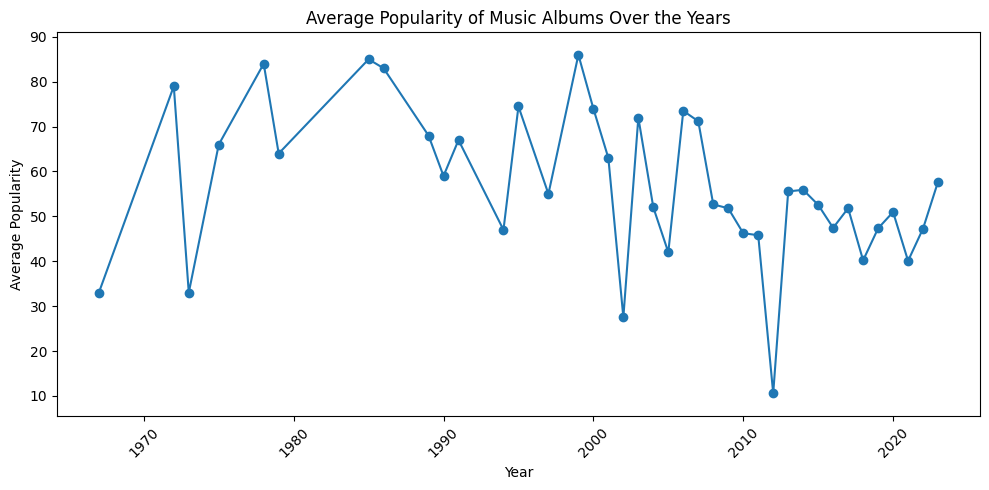

In [16]:
#6pts

df['Year'] = df['Album Date'].str.slice(0,4).astype(int)

popularity = df.groupby('Year')['Popularity'].mean().reset_index()

minPopularity = popularity['Popularity'].min() - 5
maxPopularity = popularity['Popularity'].max() + 5

plt.figure(figsize=(10, 5))
plt.plot(popularity['Year'], popularity['Popularity'], marker='o')

plt.ylim(minPopularity, maxPopularity)

plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Over the Years')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

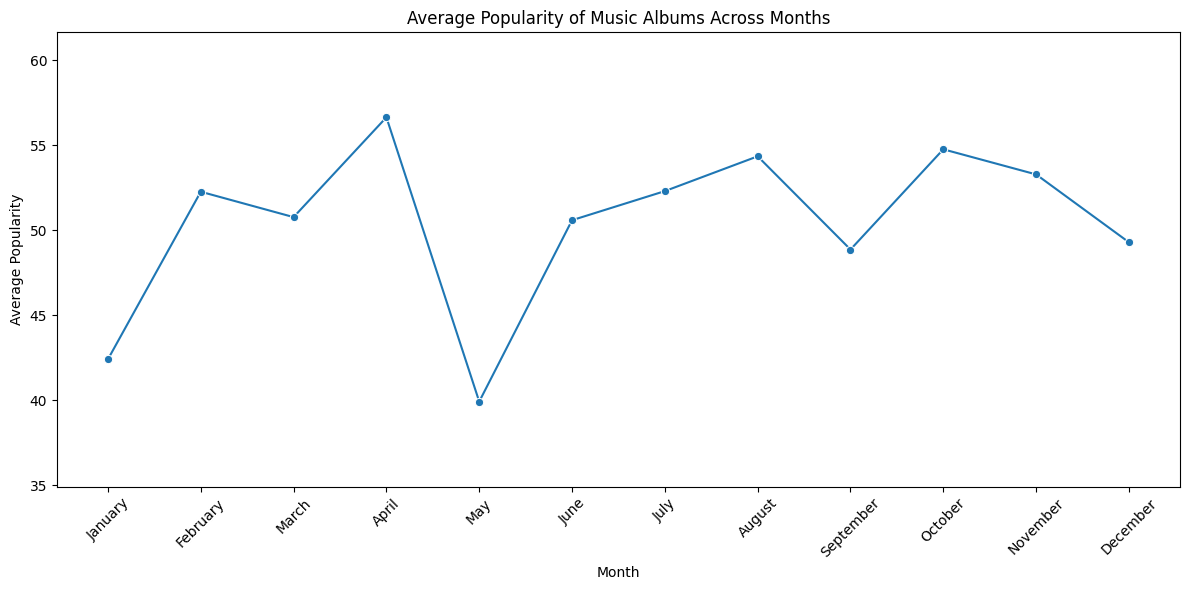

In [17]:
df['Month'] = pd.to_datetime(df['Album Date'], errors='coerce').dt.strftime('%B')

df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

df.dropna(subset=['Popularity', 'Month'], inplace=True)

months = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

averagePopularity = df.groupby('Month', observed=False)['Popularity'].mean().reset_index()

minPopularity2 = averagePopularity['Popularity'].min() - 5
maxPopularity2 = averagePopularity['Popularity'].max() + 5

plt.figure(figsize=(12, 6))
sns.lineplot(data=averagePopularity, x='Month', y='Popularity', marker='o')

plt.title('Average Popularity of Music Albums Across Months')
plt.xlabel('Month')
plt.ylabel('Average Popularity')

plt.ylim(minPopularity2, maxPopularity2)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


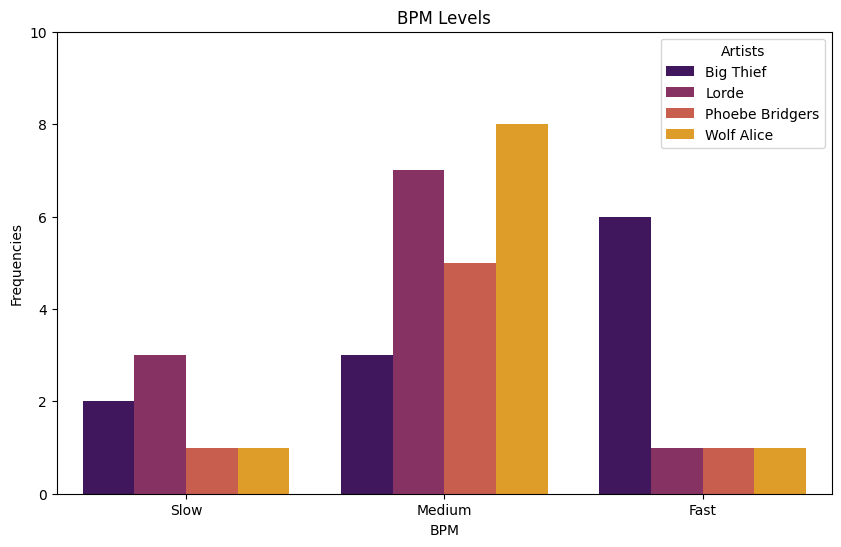

In [18]:
#7pts

def categorize_bpm(bpm):
    if bpm < 100:
        return 'Slow'
    elif 100 <= bpm <= 130:
        return 'Medium'
    else:
        return 'Fast'

df['BPM_Category'] = df['BPM'].apply(categorize_bpm)

artists = ['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice']
filteredDf2 = df[df['Artist'].isin(artists)]

plt.figure(figsize=(10, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=filteredDf2, palette='inferno',
              order=['Slow', 'Medium', 'Fast'],
              hue_order=['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice'])
plt.title('BPM Levels')
plt.xlabel('BPM')
plt.ylabel('Frequencies')
plt.ylim(0, 10)
plt.legend(title='Artists')
plt.show()

We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


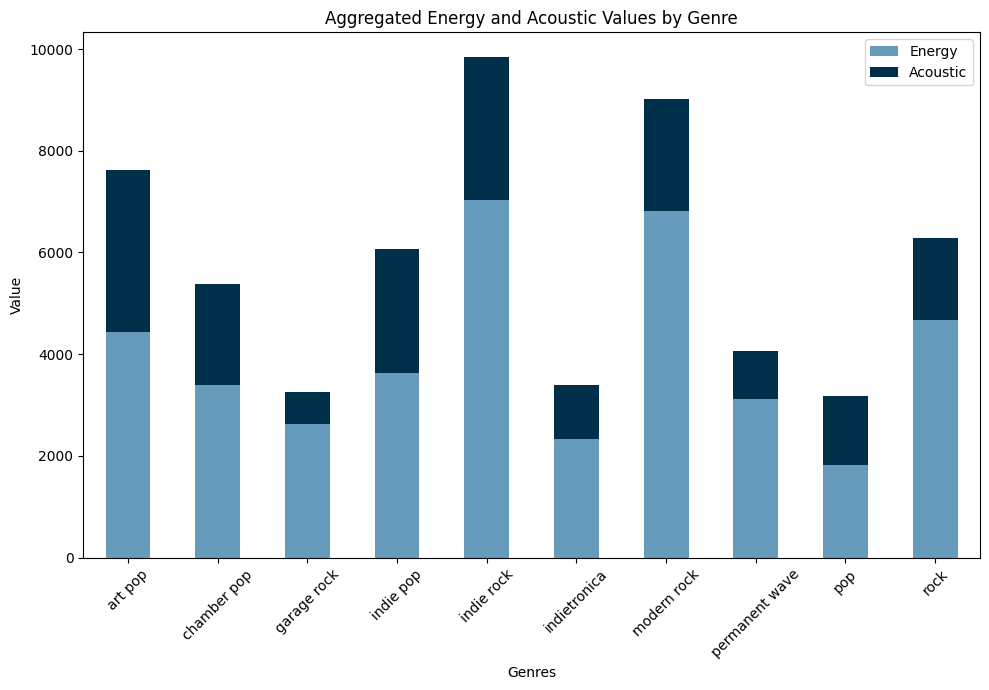

In [19]:
#7pts

topGenres2 = [
    "art pop", "chamber pop", "garage rock", "indie pop", "indie rock",
    "indietronica", "modern rock", "permanent wave", "pop", "rock"
]

df['Genres'] = df['Genres'].str.split(', ')
dfExp = df.explode('Genres')

dfTopGenres = dfExp[dfExp['Genres'].isin(topGenres2)]

genreAgg = dfTopGenres.groupby('Genres')[['Energy', 'Acoustic']].sum()

genreAgg.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'], figsize=(10, 7))

plt.title('Aggregated Energy and Acoustic Values by Genre')
plt.xlabel('Genres')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

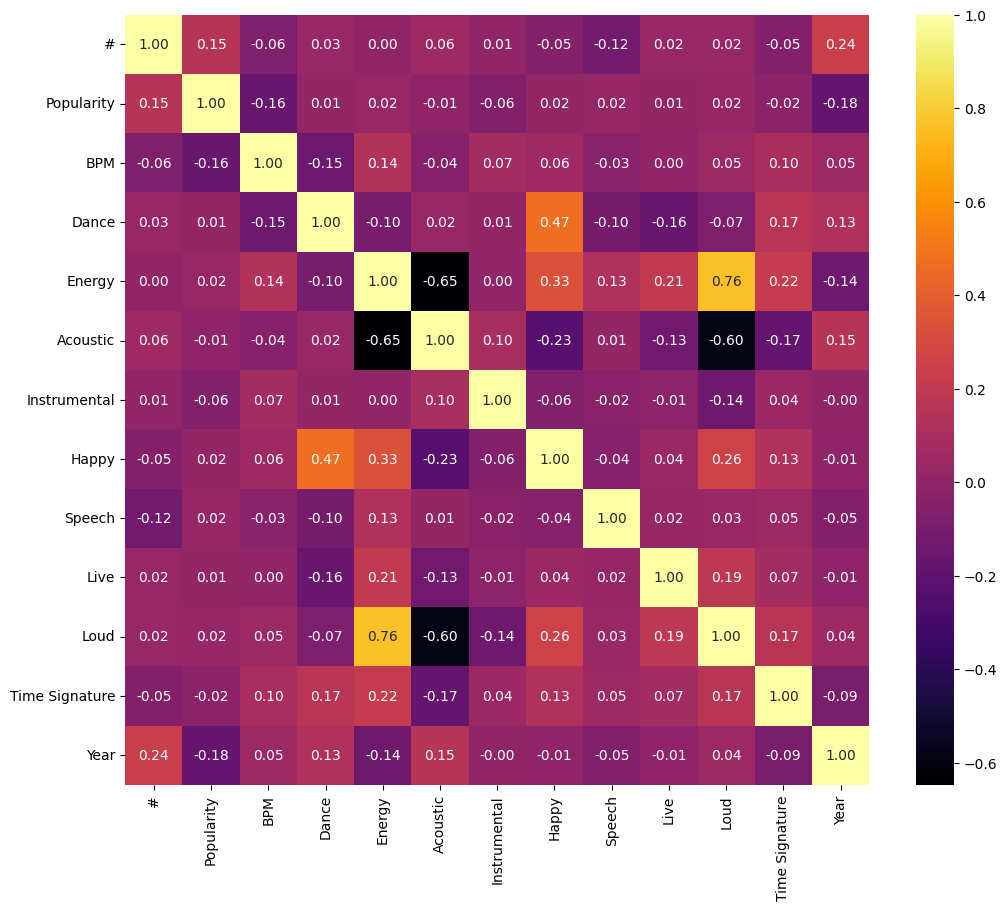

In [20]:
#4pts

numericalCols = df.select_dtypes(include='number')

mask = ~numericalCols.columns.str.contains("Unnamed")

numericalCols = numericalCols.loc[:, mask]

matrix = numericalCols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap="inferno")

plt.show()

And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [21]:
#4pts

from bs4 import BeautifulSoup

url = 'https://chat.openai.com/share/d72b5622-45bc-459e-9087-8fd2c8c963d1'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

print("HTML content: ")

print(soup.prettify())

HTML content: 
<html>
 <head>
  <style global="">
   body{font-family:Arial,Helvetica,sans-serif}.container{align-items:center;display:flex;flex-direction:column;gap:2rem;height:100%;justify-content:center;width:100%}@keyframes enlarge-appear{0%{opacity:0;transform:scale(75%) rotate(-90deg)}to{opacity:1;transform:scale(100%) rotate(0deg)}}.logo{color:#8e8ea0}.scale-appear{animation:enlarge-appear .4s ease-out}@media (min-width:768px){.scale-appear{height:48px;width:48px}}.data:empty{display:none}.data{border-radius:5px;color:#8e8ea0;text-align:center}@media (prefers-color-scheme:dark){body{background-color:#343541}.logo{color:#acacbe}}
  </style>
  <meta content="375" http-equiv="refresh"/>
 </head>
 <body>
  <div class="container">
   <div class="logo">
    <svg class="scale-appear" fill="none" height="41" strokewidth="2" viewbox="0 0 41 41" width="41" xmlns="http://www.w3.org/2000/svg">
     <path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

